# MSA 2023 Phase 2 - Part 1

In [84]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [85]:
#A representation of the raw dataset, looking at the values for the first 10 rows of the dataset.
dataset = "credit_risk.csv"
target_variable = 'class'
dataframe = pd.read_csv(dataset)
heatmap_dataframe = dataframe.copy() #This heatmap_dataframe is a copy that will be used later in correlation representation.
dataframe.head(10) 


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [86]:
#Examining the variables, whether they are numerical.
variables_all = dataframe.columns
print("The variables of this dataset are: ", list(variables_all))
print()
numerical = []
non_numerical = []
for variable in dataframe:
    if (dataframe[variable].dtypes == "int64" or dataframe[variable].dtypes == "float64"):
        numerical.append(variable)
    else:
        non_numerical.append(variable)

print(f"The Numerical variables are: {numerical}") 
print()
print(f"The Non-numerical variables are: {non_numerical}")
print()
print("The target variable is:", target_variable)
print()
print(dataframe.dtypes)

The variables of this dataset are:  ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']

The Numerical variables are: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

The Non-numerical variables are: ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']

The target variable is: class

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_sta

In [87]:
#This code outputs the Analysis, Mean, Range, Standard_Deviation for the numerical variables
dataframe.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [88]:
#The following are categorical variables in its raw form, the following code outputs the number of unique groups per category.
print("Number of unique categorical groups:")
for variable in non_numerical:
    print(variable, len(set(dataframe[variable])), set(dataframe[variable]))

Number of unique categorical groups:
checking_status 4 {'0<=X<200', 'no checking', '<0', '>=200'}
credit_history 5 {'no credits/all paid', 'existing paid', 'delayed previously', 'critical/other existing credit', 'all paid'}
purpose 10 {'furniture/equipment', 'repairs', 'other', 'domestic appliance', 'new car', 'retraining', 'radio/tv', 'education', 'business', 'used car'}
savings_status 5 {'500<=X<1000', '<100', '>=1000', '100<=X<500', 'no known savings'}
employment 5 {'4<=X<7', '>=7', '1<=X<4', 'unemployed', '<1'}
personal_status 4 {'male div/sep', 'male single', 'female div/dep/mar', 'male mar/wid'}
other_parties 3 {'guarantor', 'none', 'co applicant'}
property_magnitude 4 {'real estate', 'car', 'no known property', 'life insurance'}
other_payment_plans 3 {'bank', 'stores', 'none'}
housing 3 {'for free', 'rent', 'own'}
job 4 {'unemp/unskilled non res', 'high qualif/self emp/mgmt', 'skilled', 'unskilled resident'}
own_telephone 2 {'yes', 'none'}
foreign_worker 2 {'no', 'yes'}
class 2 

## 2. Clean data

In [89]:
##xamining the null-count and type of data.
#All the features have the same number of instances.
#There are no empty input values for this dataset. However, data conversion into integer represenatation is needed.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## 3. Visualise data

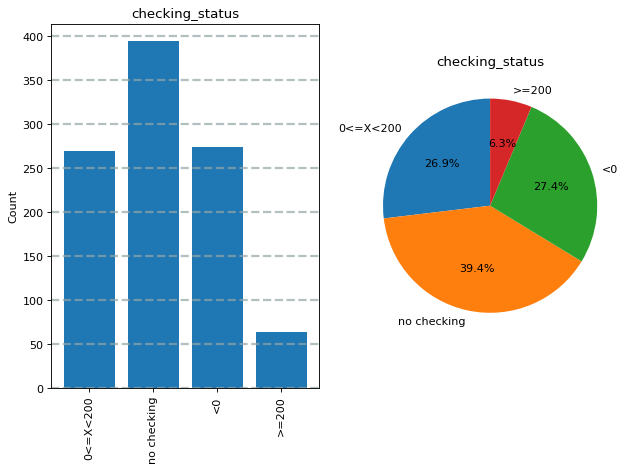

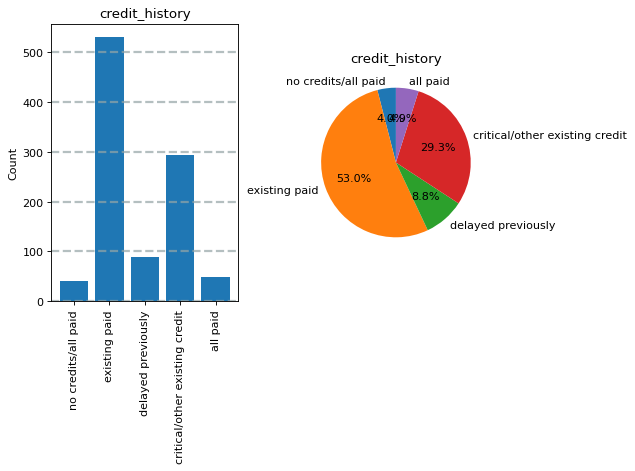

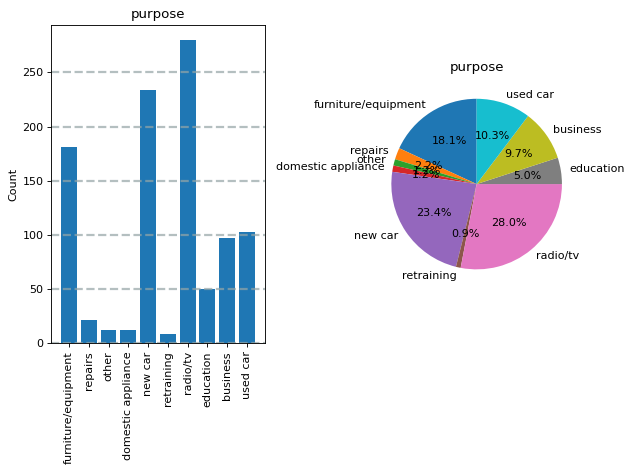

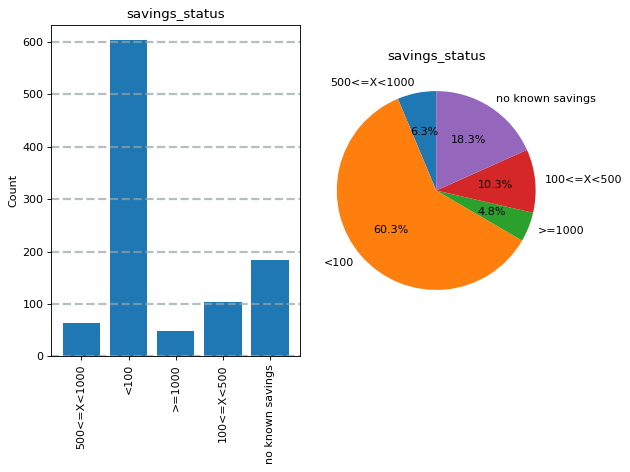

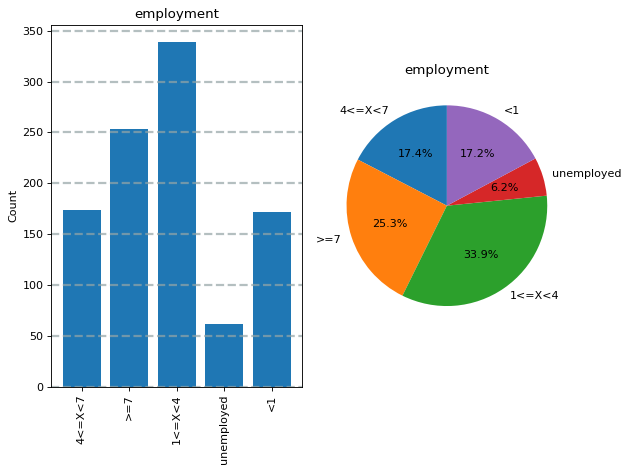

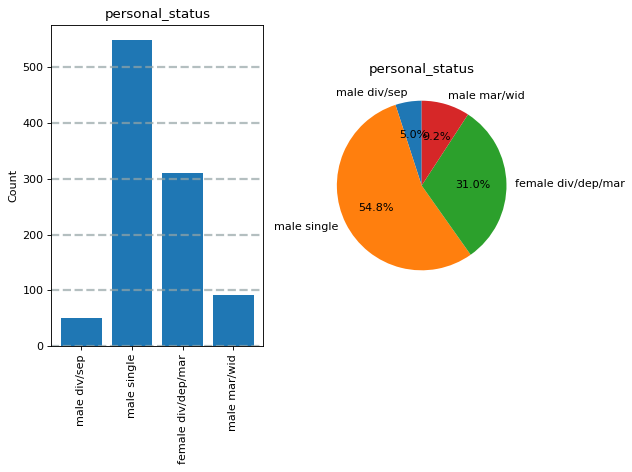

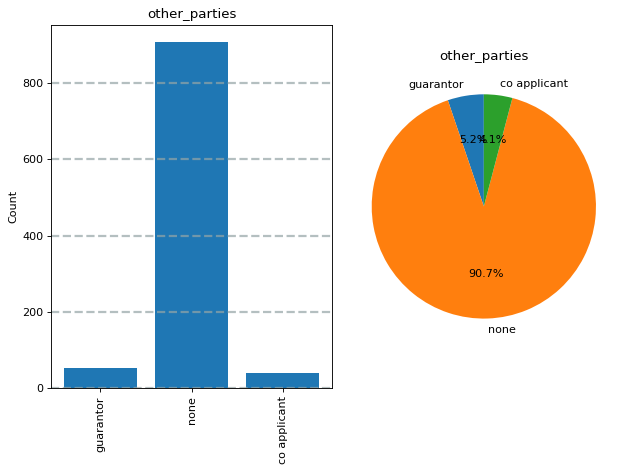

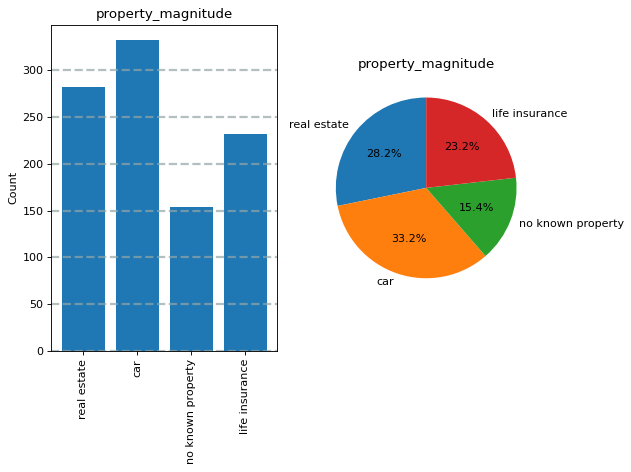

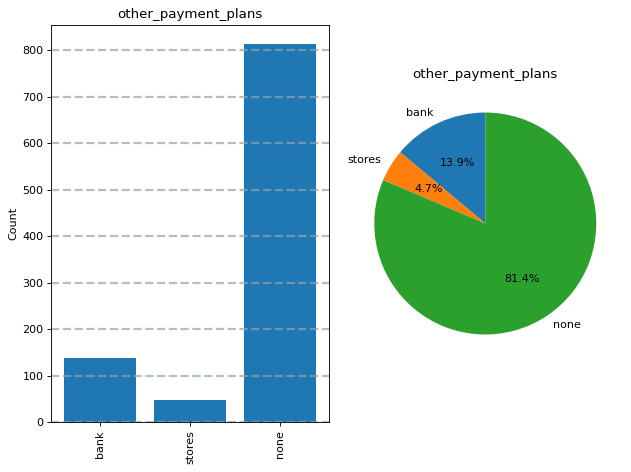

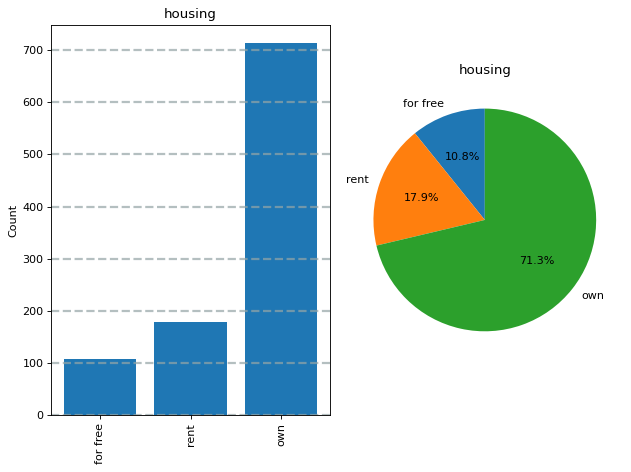

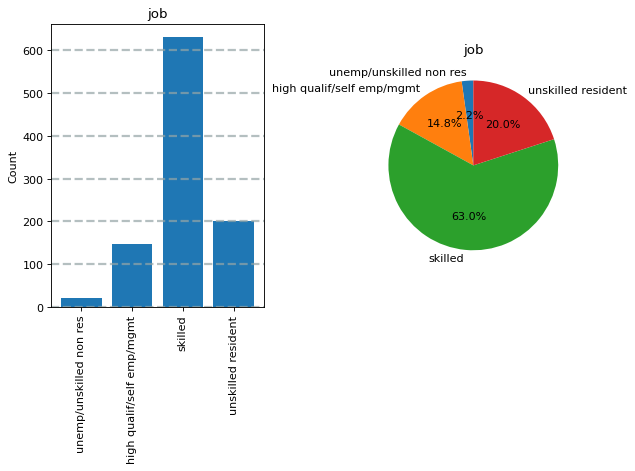

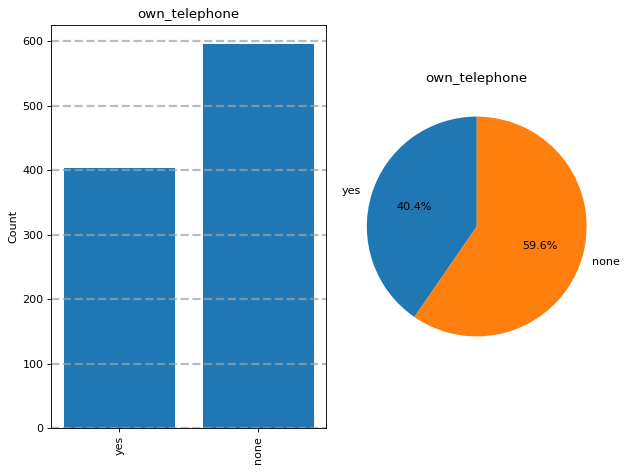

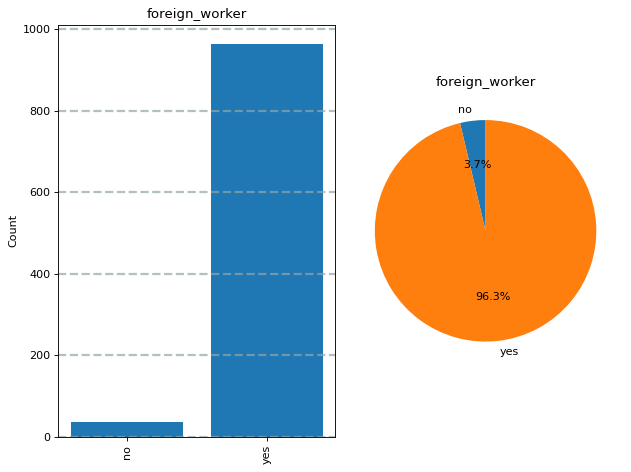

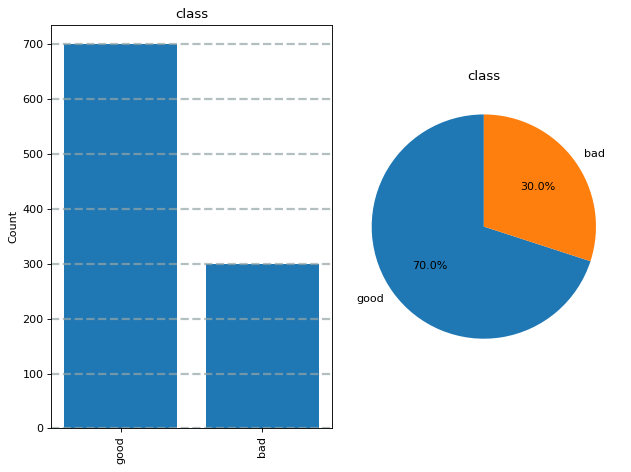

In [90]:
#The following code represents the non_numerical variables from raw dataset in the form of bar graphs and pie graphs.
#The classes of the target variable is split into 70:30.
#Despite the target class distribution, the fact that there are variables that have a 90% representation for a single value is concerning as this is indicative of low correlation. 
for variable in non_numerical:
    x = np.array(list(set(dataframe[variable])))
    y = np.array([])
    for value in x:
        y = np.append(y,dataframe[variable].value_counts()[value])
        
    figure = plt.figure(figsize=(8, 6), dpi=80)
    plt.subplot(1, 2, 1)
    plt.bar(x, height = y) 
    # Customize the chart
    plt.title(variable)
    plt.ylabel('Count')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.xticks(rotation=90)    
    
    plt.subplot(1, 2, 2)
    plt.title(variable)
    plt.pie(y, labels = x, startangle = 90,autopct='%1.1f%%')
    plt.tight_layout()
     

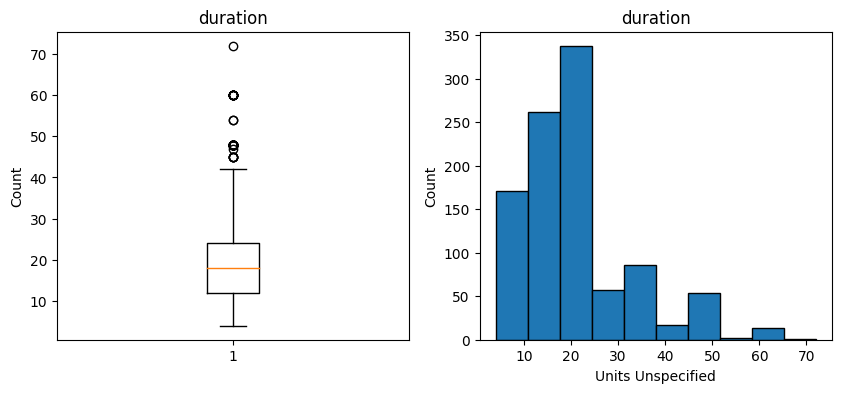

<Figure size 640x480 with 0 Axes>

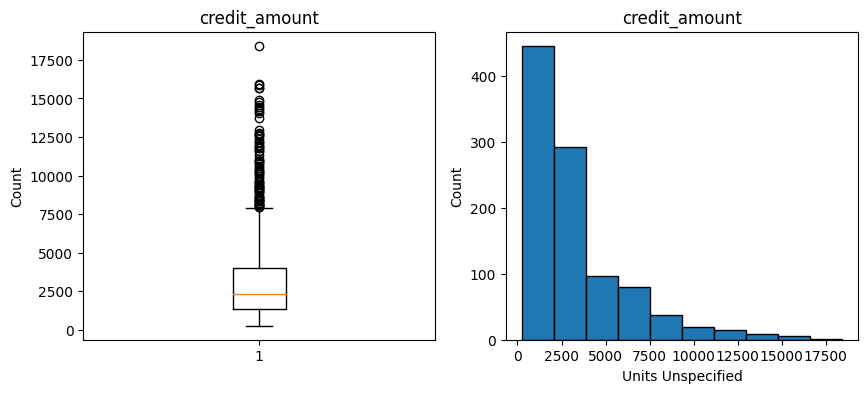

<Figure size 640x480 with 0 Axes>

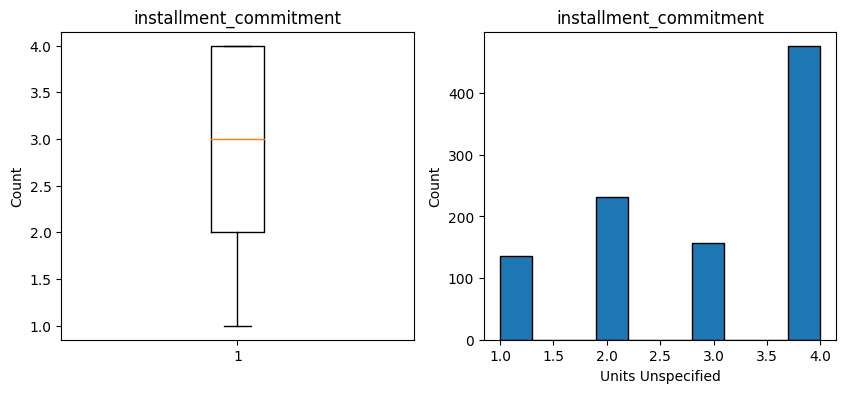

<Figure size 640x480 with 0 Axes>

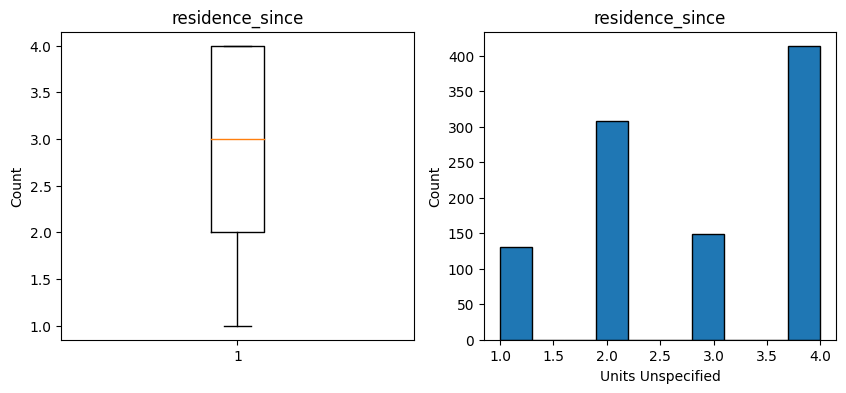

<Figure size 640x480 with 0 Axes>

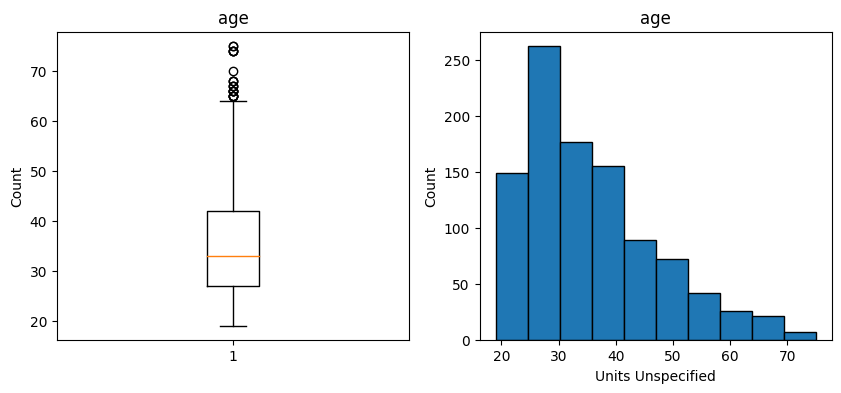

<Figure size 640x480 with 0 Axes>

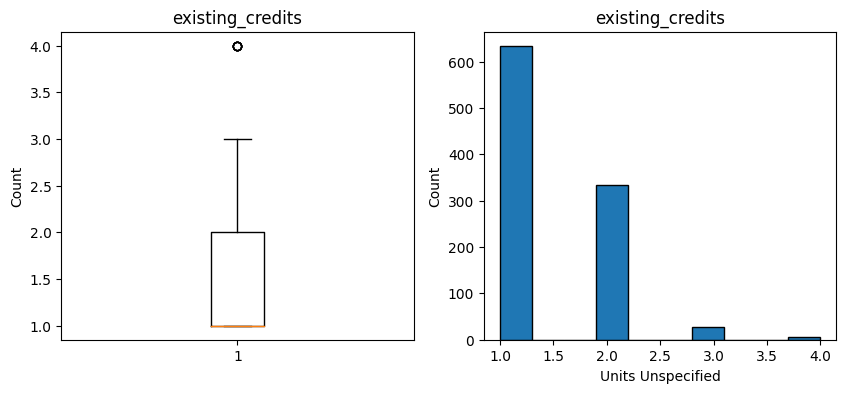

<Figure size 640x480 with 0 Axes>

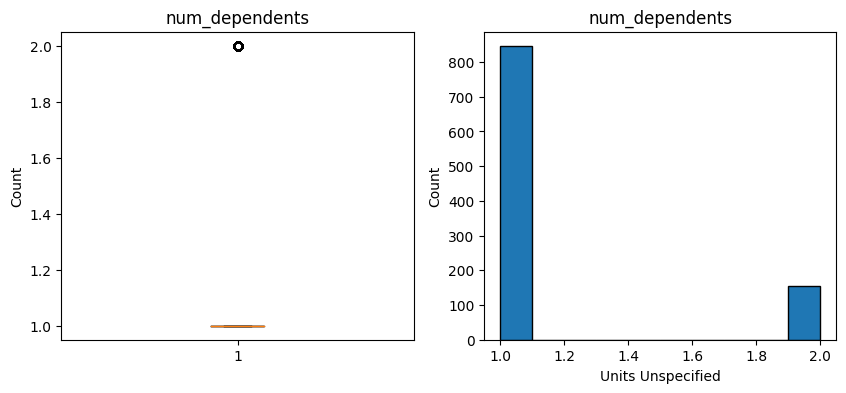

<Figure size 640x480 with 0 Axes>

In [91]:
#The following code represents the numerical variables from raw dataset in the form of a box and whiskers plot and histogram
#Many of these variables
for variable in numerical:
    var = dataframe[variable]
    fig = plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.boxplot(var)
    plt.ylabel('Count')
    plt.title(variable)
    
    plt.subplot(1, 2, 2)
    plt.hist(var, ec="k")
    plt.xlabel('Units Unspecified')
    plt.ylabel('Count')
    plt.title(variable)
    plt.show()
    plt.tight_layout()

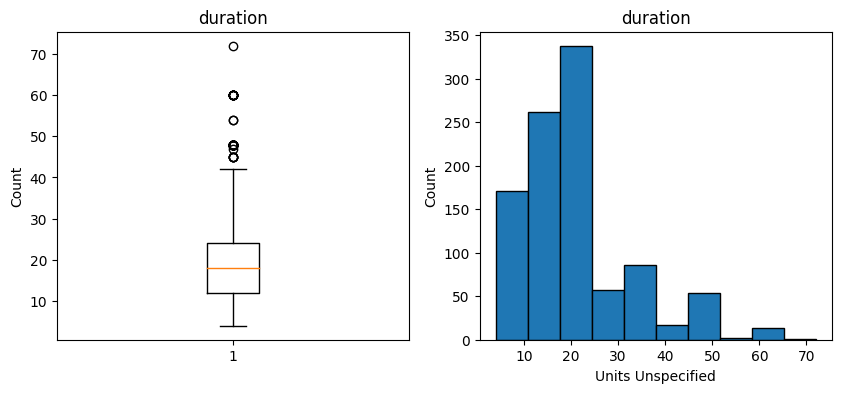

<Figure size 640x480 with 0 Axes>

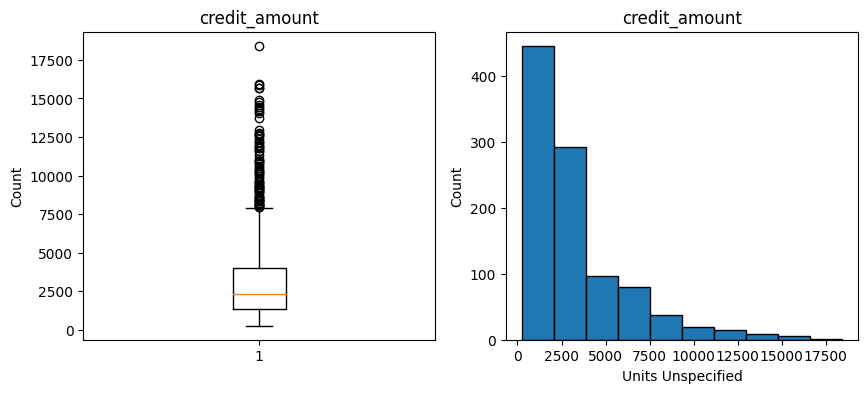

<Figure size 640x480 with 0 Axes>

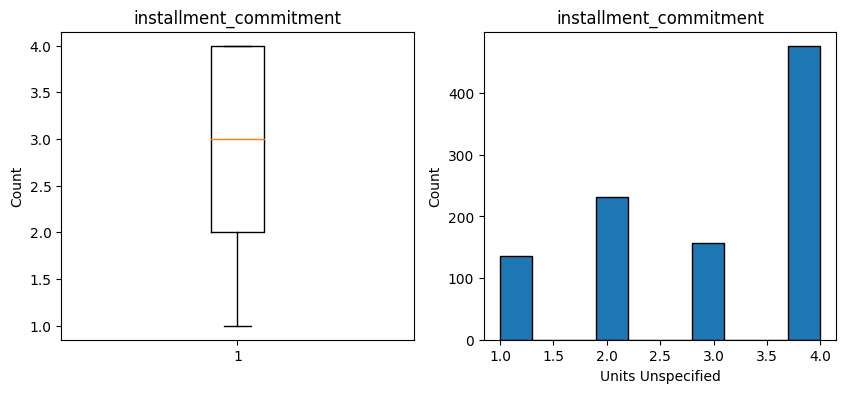

<Figure size 640x480 with 0 Axes>

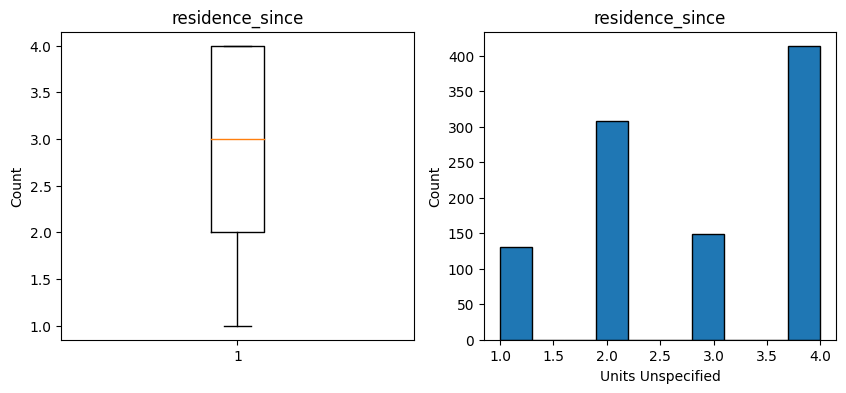

<Figure size 640x480 with 0 Axes>

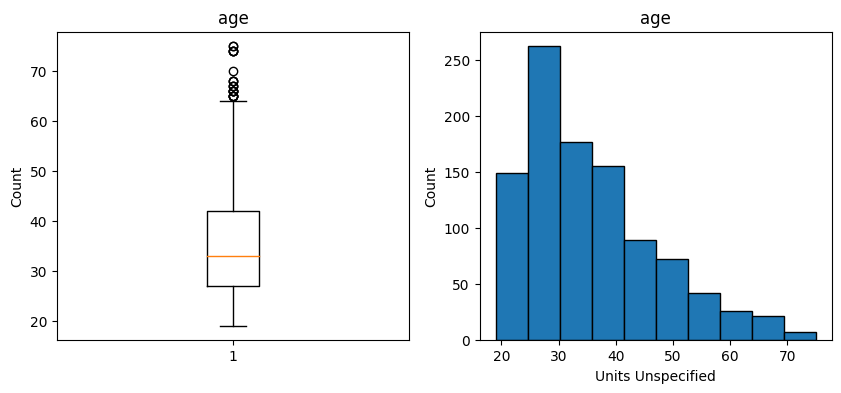

<Figure size 640x480 with 0 Axes>

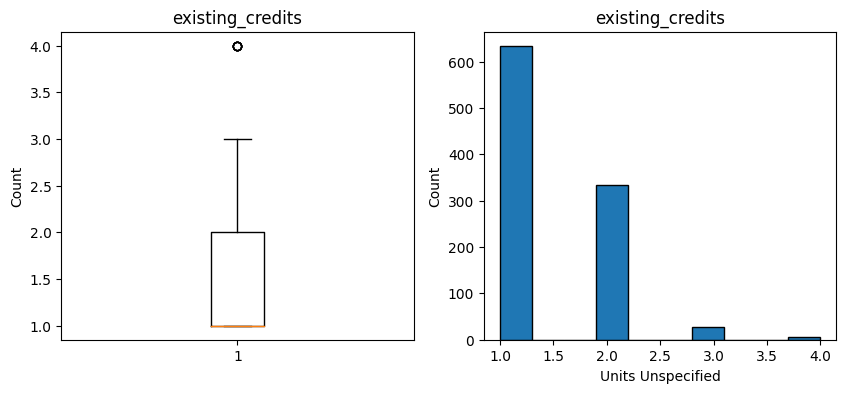

<Figure size 640x480 with 0 Axes>

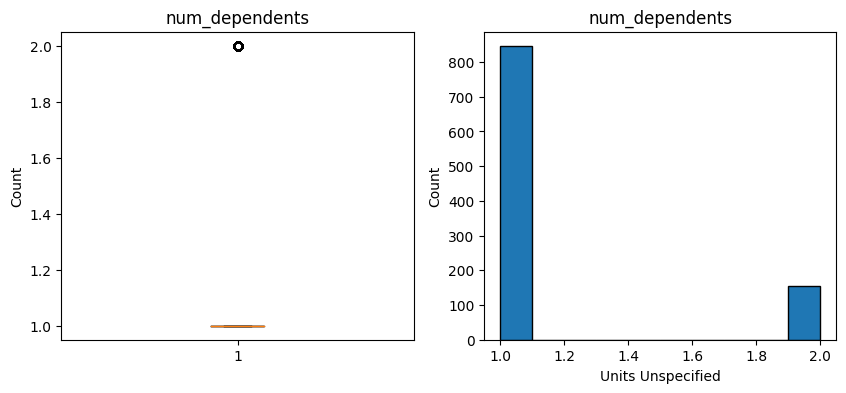

<Figure size 640x480 with 0 Axes>

In [92]:
for variable in numerical:
    var = dataframe[variable]
    fig = plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.boxplot(var)
    plt.ylabel('Count')
    plt.title(variable)
    
    plt.subplot(1, 2, 2)
    plt.hist(var, ec="k")
    plt.xlabel('Units Unspecified')
    plt.ylabel('Count')
    plt.title(variable)
    plt.show()
    plt.tight_layout()

## 4. Identify correlated variables

In [93]:
#Given this dataset has a sufficient number of numerical variables, this heatmap shoes the correlation between the numerical variables.
#fig, ax = plt.subplots(figsize =(12,12))
#sns.heatmap(dataframe.corr())

In [94]:
#The following code OneHotEncodes the categorical variables into integer representation. This allows statistical analysis for correlation and model training on this dadtaset.
from sklearn import preprocessing
target_variable_copy = dataframe['class'].copy()
new_target_columns = []
for value in non_numerical:
    encoder = sklearn.preprocessing.OneHotEncoder(sparse =False)
    encoded_data = pd.DataFrame(encoder.fit_transform(dataframe[[value]]))
    encoded_data.columns = encoder.get_feature_names_out([value])
    if value == target_variable:
        new_target_columns = encoded_data.columns
    dataframe = dataframe.join(encoded_data)
    dataframe.drop(value,axis=1,inplace= True)

c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\kimby\Desktop\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remo

<Axes: >

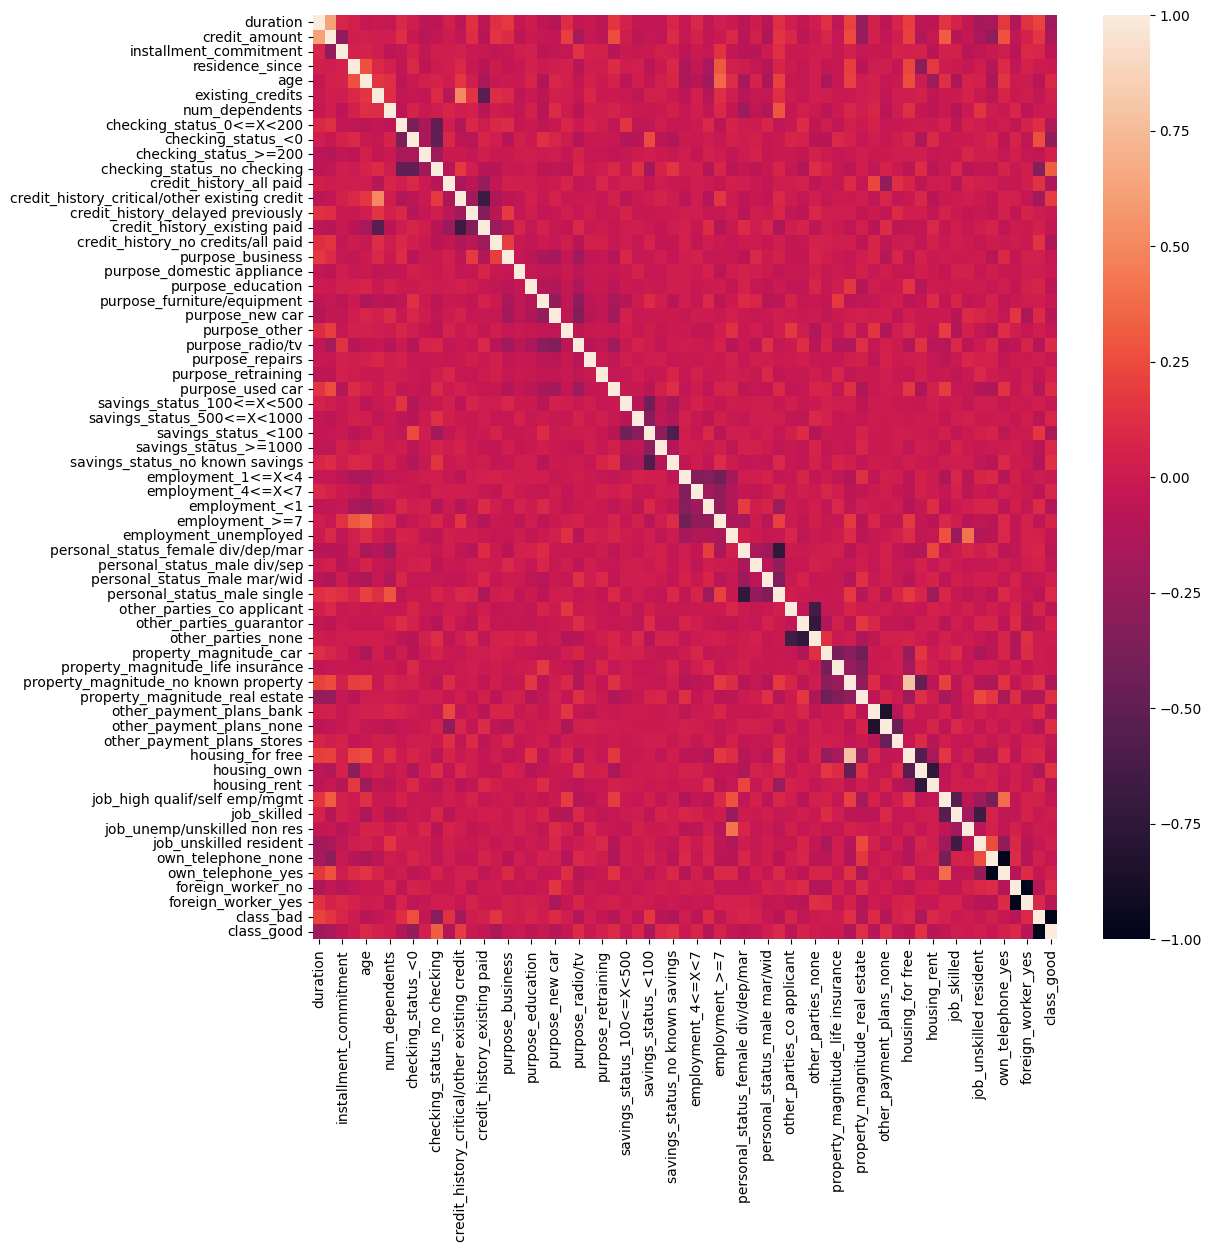

In [95]:
#This heatmap shows the correlation of all the variables(OneHotEncoded) with each other. 
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(dataframe.corr())

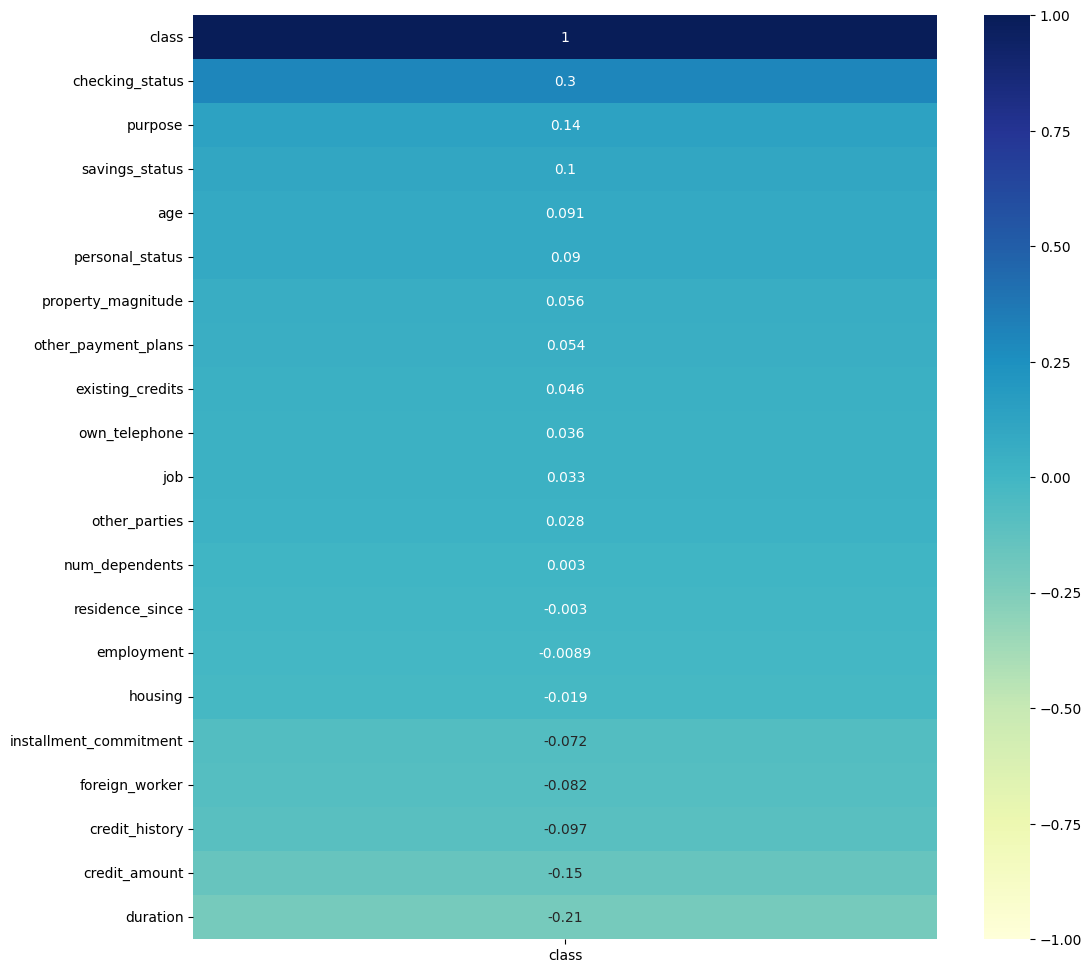

In [96]:
#Heatmap that shows the correlation of the variables in relation to the target variable.
for value in non_numerical:
    heatmap_dataframe[value] = heatmap_dataframe[value].astype('category')
    heatmap_dataframe[value] = heatmap_dataframe[value].cat.codes
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(heatmap_dataframe.corr()[['class']].sort_values('class').tail(40),vmax=1,vmin=-1,cmap='YlGnBu',annot=True, ax=ax)
ax.invert_yaxis()

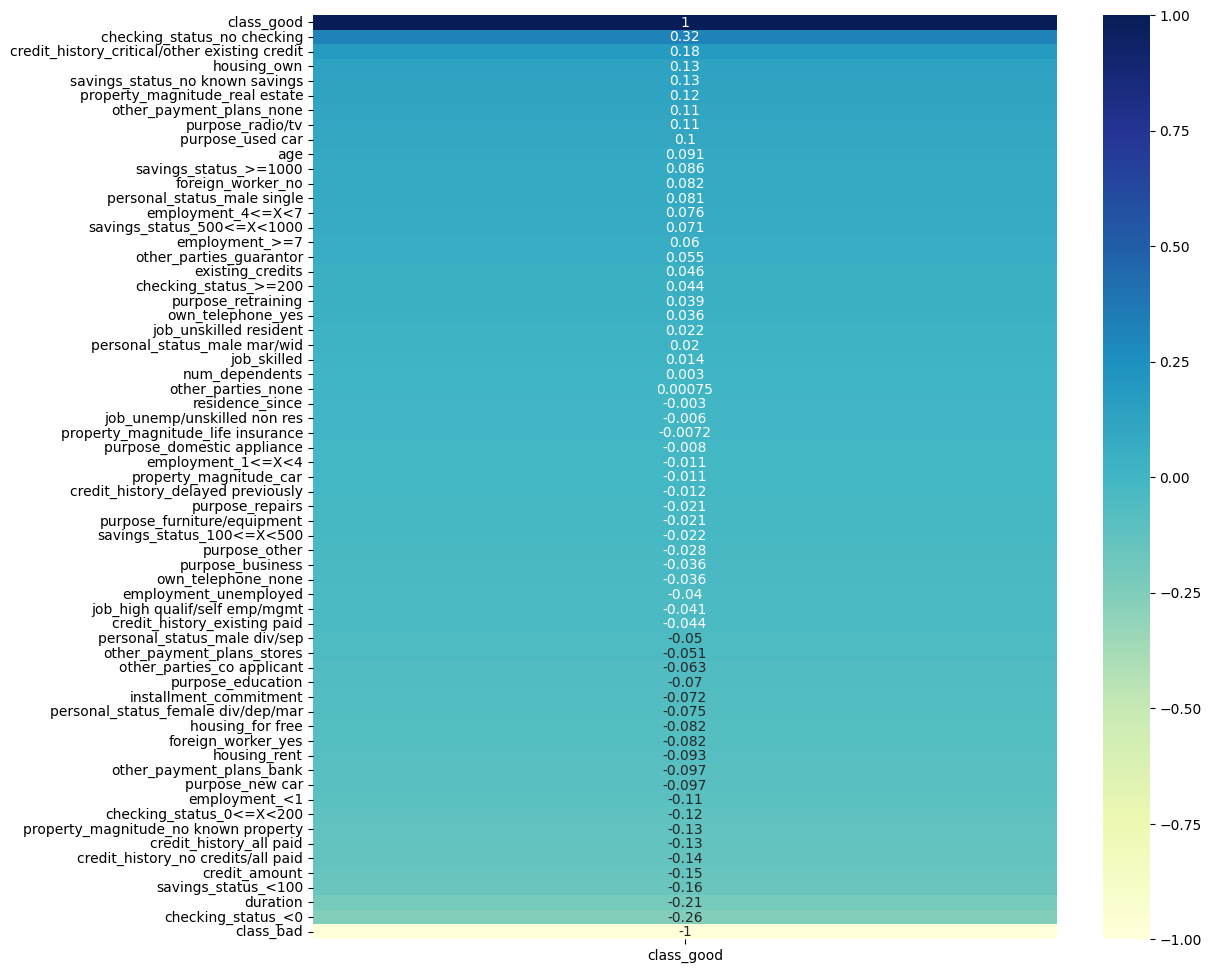

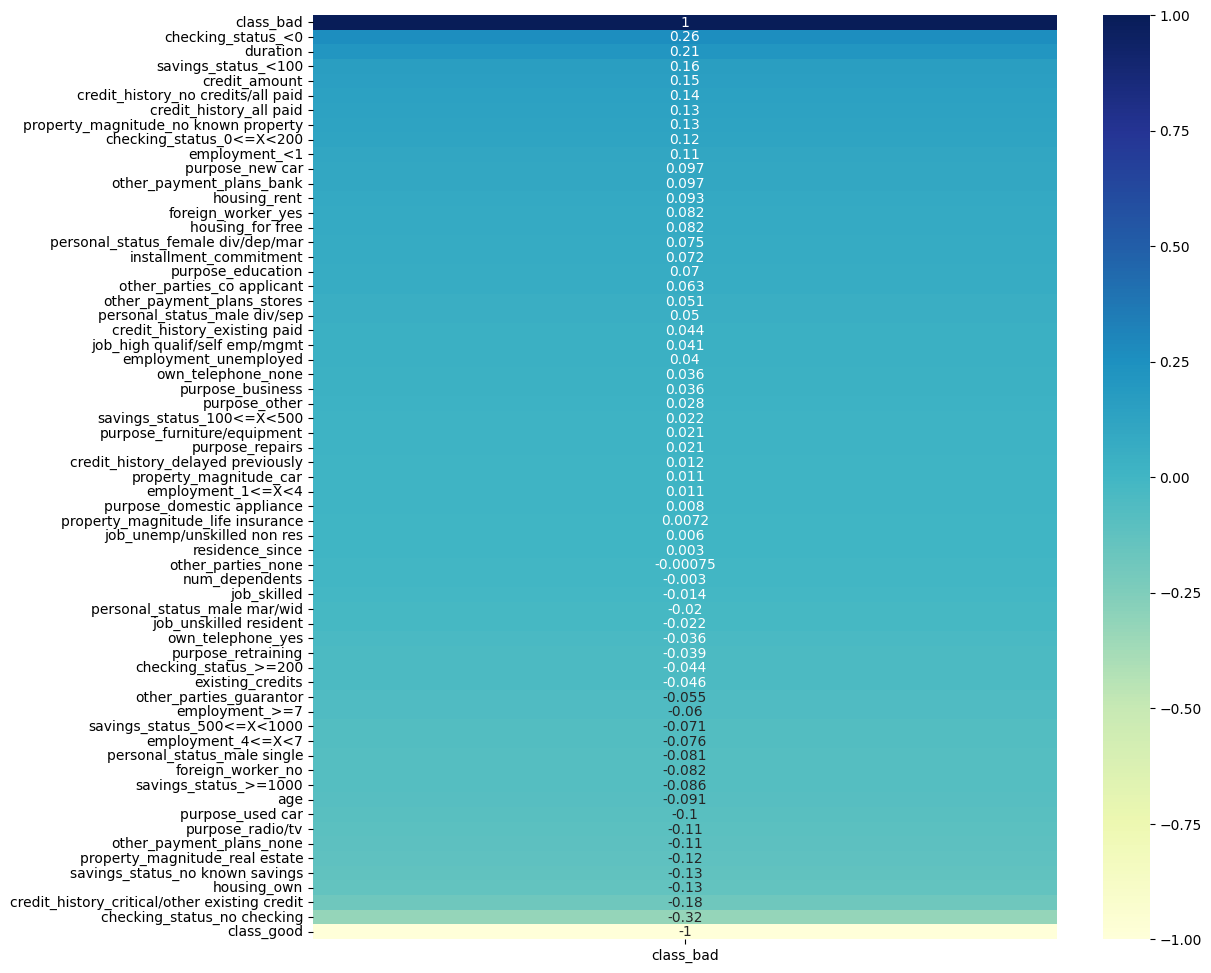

In [97]:
#Heatmap representation of the correlation of the target variable classes. It is notable that the correlation of a variable with each class grou pis inversely proportional.
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(dataframe.corr()[['class_good']].sort_values('class_good').tail(len(dataframe.columns)),vmax=1,vmin=-1,cmap='YlGnBu',annot=True, ax=ax,)
ax.invert_yaxis()

fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(dataframe.corr()[['class_bad']].sort_values('class_bad').tail(len(dataframe.columns)),vmax=1,vmin=-1,cmap='YlGnBu',annot=True, ax=ax,)
ax.invert_yaxis()

##### 5. Summary

In [98]:
#The target variable was onehotencoded for the purposes to see correlation. However, when conducting training and testing, the target needs to be a single variable.
for value in new_target_columns:
    dataframe = dataframe.drop(value, axis = 'columns')
target_variable_copy = target_variable_copy.astype('category')
target_variable_copy = target_variable_copy.cat.codes
dataframe[target_variable] = target_variable_copy
dataframe.info

<bound method DataFrame.info of      duration  credit_amount  installment_commitment  residence_since   age  \
0         6.0         1169.0                     4.0              4.0  67.0   
1        48.0         5951.0                     2.0              2.0  22.0   
2        12.0         2096.0                     2.0              3.0  49.0   
3        42.0         7882.0                     2.0              4.0  45.0   
4        24.0         4870.0                     3.0              4.0  53.0   
..        ...            ...                     ...              ...   ...   
995      12.0         1736.0                     3.0              4.0  31.0   
996      30.0         3857.0                     4.0              4.0  40.0   
997      12.0          804.0                     4.0              4.0  38.0   
998      45.0         1845.0                     4.0              4.0  23.0   
999      45.0         4576.0                     3.0              4.0  27.0   

     existing_credi

In [99]:
dataframe.to_csv("preprocessed_credit_scores.csv")

## 5. Further Changes

In [101]:
#Initally, I was satisfied with using all variables. However, I then soon realised that the variables with low correlation and unbalanced distrbution could introduce bias.
#Therefore, I decided to use a Chisqured False Positive Rate test for feature selection. This would control the total amount of false detections.
from sklearn.feature_selection import chi2, SelectFpr

feature_names = heatmap_dataframe.columns[:len(heatmap_dataframe.columns)-1]
features = heatmap_dataframe[feature_names]
chi2_features = SelectFpr(chi2)
selector = chi2_features.fit(features ,target_variable_copy)
new_features = selector.get_support(indices=True)
final_data = heatmap_dataframe.iloc[:,new_features].join(dataframe[target_variable])
final_data.head

<bound method NDFrame.head of      checking_status  duration  credit_history  purpose  credit_amount  \
0                  1       6.0               1        6         1169.0   
1                  0      48.0               3        6         5951.0   
2                  3      12.0               1        2         2096.0   
3                  1      42.0               3        3         7882.0   
4                  1      24.0               2        4         4870.0   
..               ...       ...             ...      ...            ...   
995                3      12.0               3        3         1736.0   
996                1      30.0               3        9         3857.0   
997                3      12.0               3        6          804.0   
998                1      45.0               3        6         1845.0   
999                0      45.0               1        9         4576.0   

     savings_status  personal_status   age  class  
0                 4          

In [102]:
final_data.to_csv("changed_credit_scores.csv")